In [30]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

# Настройка отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

In [31]:
# Загрузка данных с правильными параметрами
# Разделитель - ';', десятичный разделитель - '.' (по умолчанию)
data = pd.read_csv('Auto2.csv', sep=';', decimal='.')

# Первичный осмотр данных
print("=== ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ ===")
print(f"Размерность данных: {data.shape}")
print(f"Число строк: {data.shape[0]}")
print(f"Число столбцов: {data.shape[1]}")
print("\nПервые 5 строк:")
display(data.head())

=== ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ ===
Размерность данных: (392, 12)
Число строк: 392
Число столбцов: 12

Первые 5 строк:


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,small,NaN,NaN,NaN
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,small,NaN,NaN,NaN
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,small,NaN,NaN,NaN
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,small,NaN,NaN,`
4,ford torino,17.0,8,302.0,140,3449,10.5,70,small,NaN,NaN,NaN


In [32]:
# Более детальная информация о данных
print("=== ИНФОРМАЦИЯ О ДАННЫХ ===")
print(data.info())
print("\nСтатистическое описание числовых колонок:")
display(data.describe().round(2))

=== ИНФОРМАЦИЯ О ДАННЫХ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          392 non-null    object 
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   year          392 non-null    int64  
 8   origin        392 non-null    object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   1 non-null      object 
dtypes: float64(5), int64(4), object(3)
memory usage: 36.9+ KB
None

Статистическое описание числовых колонок:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,Unnamed: 9,Unnamed: 10
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,0.0,0.0
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,NaN,NaN
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,NaN,NaN
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,NaN,NaN
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,NaN,NaN
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,NaN,NaN
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,NaN,NaN
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,NaN,NaN


In [33]:
# Очистка данных - удаление полностью пустых столбцов
print("=== ОЧИСТКА ДАННЫХ ===")
data_cleaned = data.dropna(axis=1, how = 'all')

# Удаляем пустые столбцы
columns_to_drop = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11']
data_cleaned = data_cleaned.drop(columns=columns_to_drop, errors='ignore')

print("После удаления полностью пустых:", data_cleaned.columns.tolist())

=== ОЧИСТКА ДАННЫХ ===
После удаления полностью пустых: ['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']


In [34]:
# Создаем искусственные пропуски для демонстрации (как в задании)
print("=== СОЗДАНИЕ ИСКУССТВЕННЫХ ПРОПУСКОВ ===")
data_with_missing = data_cleaned.copy()

# Создаем пропуски в случайных местах для демонстрации
np.random.seed(42)
missing_indices = np.random.choice(data_with_missing.index, size=10, replace=False)
data_with_missing.loc[missing_indices, 'horsepower'] = None

print("Пропуски после создания искусственных:")
print(data_with_missing.isnull().sum())

=== СОЗДАНИЕ ИСКУССТВЕННЫХ ПРОПУСКОВ ===
Пропуски после создания искусственных:
name             0
mpg              0
cylinders        0
displacement     0
horsepower      10
weight           0
acceleration     0
year             0
origin           0
dtype: int64


In [35]:
# Обработка пропущенных значений
print("=== ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===")

# Метод 1: Заполнение средним значением
data_filled_mean = data_with_missing.copy()
numeric_cols_for_impute = data_filled_mean.select_dtypes(include=[np.number]).columns

# Заполняем пропуски средними значениями
for col in numeric_cols_for_impute:
    if data_filled_mean[col].isnull().sum() > 0:
        mean_val = data_filled_mean[col].mean()
        data_filled_mean[col] = data_filled_mean[col].fillna(mean_val)
        print(f"Заполнено пропусков в {col}: {data_with_missing[col].isnull().sum()} -> среднее: {mean_val:.2f}")

print(f"\nПропуски после заполнения: {data_filled_mean.isnull().sum().sum()}")

=== ОБРАБОТКА ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===
Заполнено пропусков в horsepower: 10 -> среднее: 104.94

Пропуски после заполнения: 0


In [36]:
# Нормализация данных
print("=== НОРМАЛИЗАЦИЯ ДАННЫХ ===")

# Выбираем числовые колонки для нормализации
numeric_features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

# Создаем копию данных для нормализации
data_for_scaling = data_filled_mean[numeric_features].copy()

print("До нормализации (первые 5 строк):")
display(data_for_scaling.head())

# Min-Max нормализация
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(data_for_scaling)
data_minmax_df = pd.DataFrame(data_minmax, columns=[f"{col}_minmax" for col in numeric_features])

print("\nПосле Min-Max нормализации (первые 5 строк):")
display(data_minmax_df.head())

print(f"\nДиапазон после Min-Max нормализации:")
for i, col in enumerate(numeric_features):
    print(f"{col}: [{data_minmax_df.iloc[:, i].min():.3f}, {data_minmax_df.iloc[:, i].max():.3f}]")

=== НОРМАЛИЗАЦИЯ ДАННЫХ ===
До нормализации (первые 5 строк):


,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5



После Min-Max нормализации (первые 5 строк):


,mpg_minmax,displacement_minmax,horsepower_minmax,weight_minmax,acceleration_minmax
0,0.239362,0.617571,0.456522,0.536150,0.238095
1,0.159574,0.728682,0.646739,0.589736,0.208333
2,0.239362,0.645995,0.565217,0.516870,0.178571
3,0.186170,0.609819,0.565217,0.516019,0.238095
4,0.212766,0.604651,0.510870,0.520556,0.148810



Диапазон после Min-Max нормализации:
mpg: [0.000, 1.000]
displacement: [0.000, 1.000]
horsepower: [0.000, 1.000]
weight: [0.000, 1.000]
acceleration: [0.000, 1.000]


In [37]:
# Стандартизация данных
print("=== СТАНДАРТИЗАЦИЯ ДАННЫХ ===")

# StandardScaler стандартизация
standard_scaler = StandardScaler()
data_standard = standard_scaler.fit_transform(data_for_scaling)
data_standard_df = pd.DataFrame(data_standard, columns=[f"{col}_standard" for col in numeric_features])

print("После стандартизации (первые 5 строк):")
display(data_standard_df.head())

print(f"\nСтатистика после стандартизации:")
stats_standard = pd.DataFrame({
    'Среднее': data_standard_df.mean(),
    'Стандартное отклонение': data_standard_df.std(),
    'Минимум': data_standard_df.min(),
    'Максимум': data_standard_df.max()
})
display(stats_standard)

=== СТАНДАРТИЗАЦИЯ ДАННЫХ ===
После стандартизации (первые 5 строк):


,mpg_standard,displacement_standard,horsepower_standard,weight_standard,acceleration_standard
0,-0.698638,1.077290,0.659943,0.620540,-1.285258
1,-1.083498,1.488732,1.581739,0.843334,-1.466724
2,-0.698638,1.182542,1.186684,0.540382,-1.648189
3,-0.955212,1.048584,1.186684,0.536845,-1.285258
4,-0.826925,1.029447,0.923313,0.555706,-1.829655



Статистика после стандартизации:


,Среднее,Стандартное отклонение,Минимум,Максимум
mpg_standard,1.450087e-16,1.001278,-1.853218,2.970359
displacement_standard,-7.250436e-17,1.001278,-1.209563,2.493416
horsepower_standard,-5.800349e-16,1.001278,-1.552369,3.293647
weight_standard,-1.812609e-17,1.001278,-1.608575,2.549061
acceleration_standard,4.350262e-16,1.001278,-2.736983,3.360262


=== СРАВНЕНИЕ МЕТОДОВ МАСШТАБИРОВАНИЯ ===


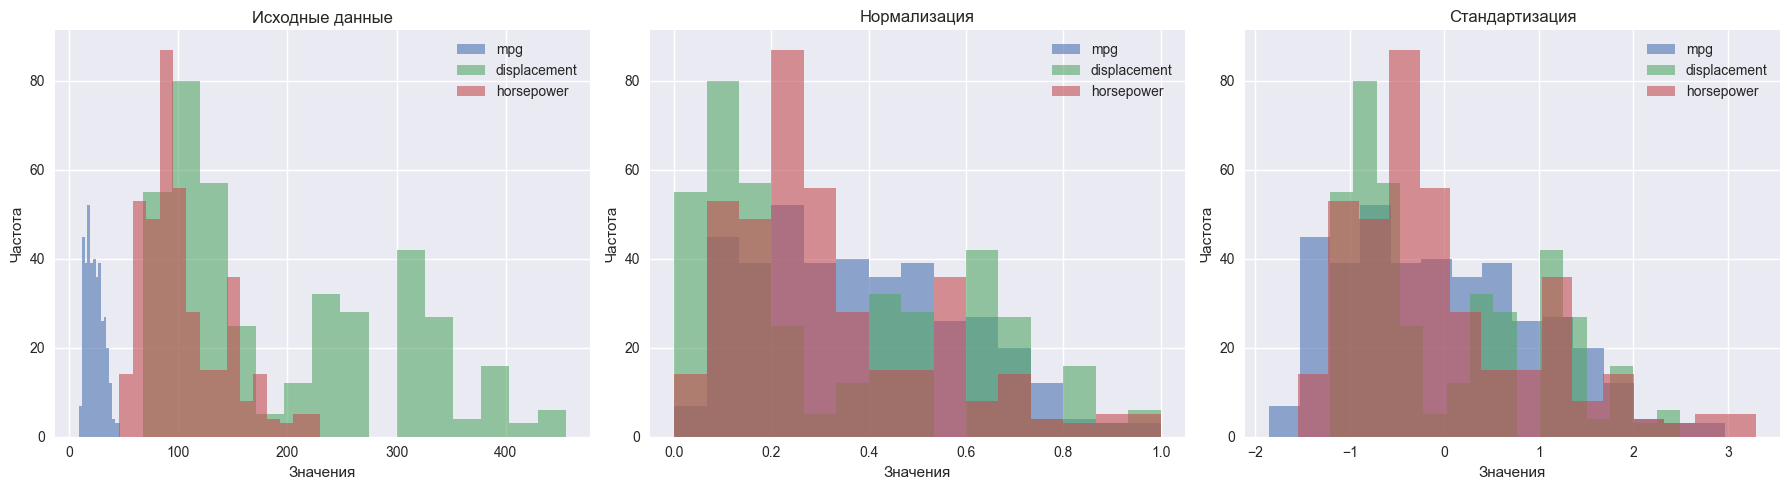

In [38]:
# Сравнение методов масштабирования
print("=== СРАВНЕНИЕ МЕТОДОВ МАСШТАБИРОВАНИЯ ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Исходные данные
for i, col in enumerate(numeric_features[:3]):  # Показываем только первые 3 признака
    axes[0].hist(data_for_scaling[col], alpha=0.6, label=col, bins=15)
axes[0].set_title('Исходные данные')
axes[0].set_xlabel('Значения')
axes[0].set_ylabel('Частота')
axes[0].legend()

# После нормализации
for i, col in enumerate(numeric_features[:3]):
    axes[1].hist(data_minmax_df.iloc[:, i], alpha=0.6, label=col, bins=15)
axes[1].set_title('Нормализация')
axes[1].set_xlabel('Значения')
axes[1].set_ylabel('Частота')
axes[1].legend()

# После стандартизации
for i, col in enumerate(numeric_features[:3]):
    axes[2].hist(data_standard_df.iloc[:, i], alpha=0.6, label=col, bins=15)
axes[2].set_title('Стандартизация')
axes[2].set_xlabel('Значения')
axes[2].set_ylabel('Частота')
axes[2].legend()

plt.tight_layout()
plt.show()